# 第5章：係り受け解析
data/ai.jaに含まれる日本語wikipediaの人工知能に関する記事のテキスト部分を抽出したものを利用してai.ja.txt.parsedに保存する

## 40.係り受け解析結果の読み込み(形態素)
形態素を表すクラスMorphを実装する

メンバ変数：
- 表層形 surface
- 基本形 base
- 品詞 pos
- 品詞細分類1 pos1

In [1]:
class Morph:
    def __init__(self, morph):
        surface, morphs = morph.split("\t")
        morph_list = morphs.split(",")
        self.surface = surface
        self.base = morph_list[6]
        self.pos = morph_list[0]
        self.pos1 = morph_list[1]

In [4]:
filepath = "./data/ai.ja/ai.ja.parsed.txt"

sentences = []
morphs = []
with open(filepath, "r") as f:
  for line in f:
    if line[0] == '*': #係り受けを示す行
      continue
    elif line != 'EOS\n': #文末
      morphs.append(Morph(line))
    else:
      if len(morphs) != 0:
        sentences.append(morphs)
        morphs = []

print(sentences)
for s in sentences:
  for m in s:
    print(vars(m)) #vars Objectのパラメータをdict形式で展開

[[<__main__.Morph object at 0x1514d0ed7f28>, <__main__.Morph object at 0x1514cae98c18>], [<__main__.Morph object at 0x1514cae98be0>, <__main__.Morph object at 0x1514cae98f98>, <__main__.Morph object at 0x1514cae98ef0>, <__main__.Morph object at 0x1514cae989b0>, <__main__.Morph object at 0x1514cae98e48>, <__main__.Morph object at 0x1514cae98780>, <__main__.Morph object at 0x1514cae98438>, <__main__.Morph object at 0x1514cae98278>, <__main__.Morph object at 0x1514cae98a90>, <__main__.Morph object at 0x1514cae989e8>, <__main__.Morph object at 0x1514cae98b38>, <__main__.Morph object at 0x1514cae98cc0>, <__main__.Morph object at 0x1514cae98550>, <__main__.Morph object at 0x1514cae98588>, <__main__.Morph object at 0x1514cae98400>, <__main__.Morph object at 0x1514cae98eb8>, <__main__.Morph object at 0x1514cae98978>, <__main__.Morph object at 0x1514cae98ac8>, <__main__.Morph object at 0x1514cae98470>, <__main__.Morph object at 0x1514cae98908>, <__main__.Morph object at 0x1514cae984a8>, <__main

## 41.係り受け解析結果の読み込み(文節・係り受け)
文節を表すChunkクラスを実装する

メンバ変数：
- 形態素(Morphオブジェクトのリスト) morphs
- 係り先文節インデックス番号 dst
- 係り元文節インデックス番号 srcs

In [27]:
class Chunk():
  def __init__(self, morphs, dst):
    self.morphs = morphs
    self.dst = dst
    self.srcs = []
    
class Sentence():
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks):
      if chunk.dst != -1 and isinstance(chunk.dst, int):
        self.chunks[chunk.dst].srcs.append(i)

In [28]:
filepath = "./data/ai.ja/ai.ja.parsed.txt"

sentences = []
chunks = []
morphs = []
with open(filepath, "r") as f:
  for line in f:
    if line[0] == '*':  #係受け情報の行
      if len(morphs) > 0:
        chunks.append(Chunk(morphs, dst))
        morphs = []
      dst = int(line.split(' ')[2].rstrip('D')) #係り受け先(Dの前の数字)を取得
    elif line != 'EOS\n':
      morphs.append(Morph(line))
    else:  # 文末
      chunks.append(Chunk(morphs, dst))
      sentences.append(Sentence(chunks))
      morphs = []
      chunks = []
      dst = None

# 確認
for chunk in sentences[2].chunks:
  print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)

['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34]


## 42.係り元と係り先の文節の表示
係り元と係り先の文節をタブ区切りで出力する

記号は出力しない

In [30]:
for chunk in sentences[2].chunks:
  if int(chunk.dst) != -1:
    src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
    dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentences[2].chunks[int(chunk.dst)].morphs])
    print(src, dst, sep="\t")

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


## 43.名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が動詞を含む文節に係るとき、これをタブ区切りで表示する

記号は表示しない

In [34]:
sentence = sentences[2]
for chunk in sentence.chunks:
  src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
  src_pos = [morph.pos for morph in chunk.morphs]
  dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
  dst_pos = [morph.pos for morph in sentence.chunks[int(chunk.dst)].morphs]
  if '名詞' in src_pos and '動詞' in dst_pos:
    print(src, dst, sep='\t')


道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


## 44.係り受け木の可視化
与えられた文の係り受け木を有向グラフとして表現する

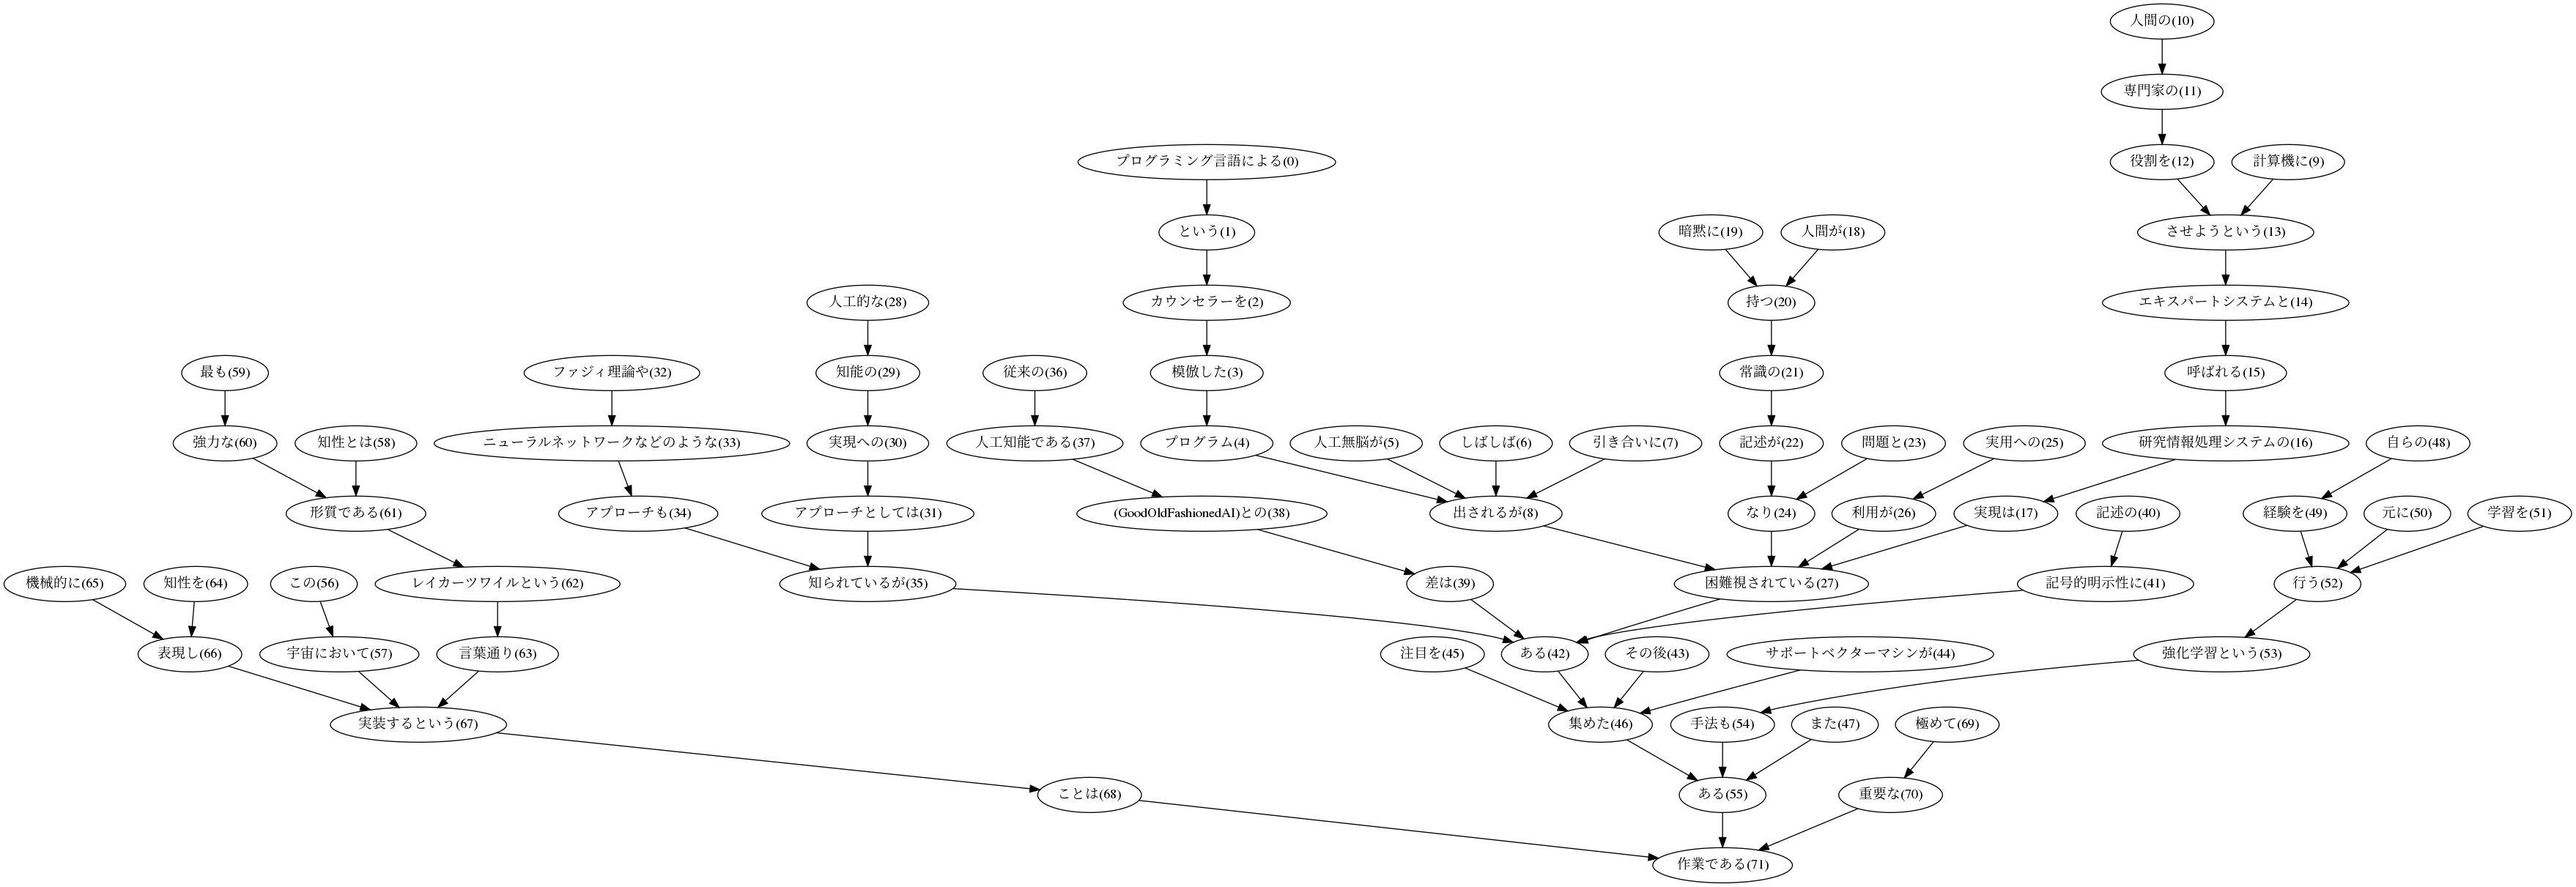

In [41]:
import pydot
from IPython.display import Image,display_png

output_path = "./data/morphgraph_output.png"

sentence = sentences[7]
edges = []
for id, chunk in enumerate(sentence.chunks):
  if int(chunk.dst) != -1:
    src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
    dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs] + ['(' + str(chunk.dst) + ')'])
    edges.append([src, dst])
g = pydot.graph_from_edges(edges, directed=True)
g.write_png(output_path)
display_png(Image(output_path))